In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv('5G_energy_consumption_dataset.csv')

In [ ]:
df.head()


,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [ ]:
df.isnull().sum()

,0
Time,0
BS,0
Energy,0
load,0
ESMODE,0
TXpower,0


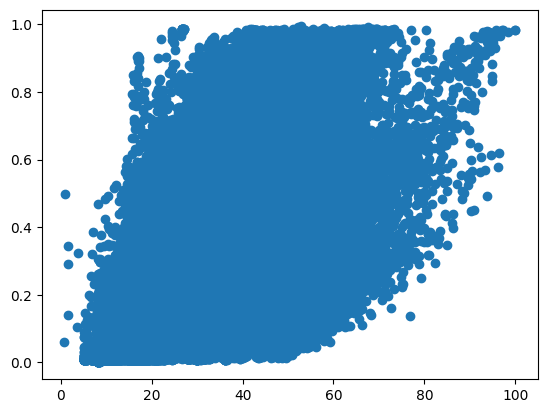

In [ ]:
plt.scatter(df['Energy'], df['load'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = df['Energy'].values.reshape(-1, 1)  # Reshape to 2D array
y = df['load'].values.reshape(-1, 1)  # Reshape to 2D array

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(type(x_train))

<class 'numpy.ndarray'>


In [ ]:
# Créer le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle avec x_train et y_train
model.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_train)

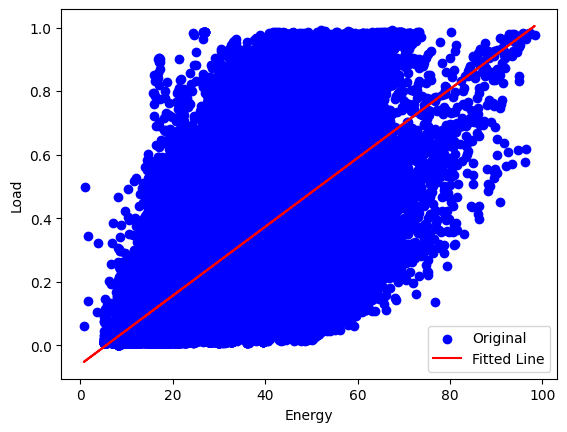

In [ ]:
plt.scatter(x_train, y_train, color='blue', label='Original')
plt.plot(x_train, y_pred, color='red', label='Fitted Line')
plt.xlabel('Energy')
plt.ylabel('Load')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédiction
predicted = model.predict(x_test)  # Tester les performances de notre modèle

# Calculer et afficher les métriques
print("MSE:", mean_squared_error(y_test, predicted))
print("R squared:", r2_score(y_test, predicted))

MSE: 0.03237697467150602
R squared: 0.40718663258585097


In [ ]:
# Save the DataFrame to a CSV file
results_df.to_csv('predictions.csv', index=False)


In [ ]:


# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten()
})

# Save the results to a CSV file
results_df.to_csv('predictions.csv', index=False)
